# Getting Started (official)

* 這份文件，摘錄自官網的 [Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

## Pandas 處理哪種 data？

* 處理 tabular data ，如下：

![](figures/schemas/01_table_dataframe.svg)

### DataFrame

* 建立 DataFrame 的方式，由 dictionary 來處理：

In [6]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

print(df)
print(type(df))

                       Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female
<class 'pandas.core.frame.DataFrame'>


* 這其實就和 excel 一樣:

![](figures/schemas/01_table_spreadsheet.png)

### Series

* 每一個 column，都是一個 `Series`

![](figures/schemas/01_table_series.svg)

* 要注意，series還是帶有 row index。例如：

In [7]:
df["Age"]

0    22
1    35
2    58
Name: Age, dtype: int64

* 如果，你想自己建立一個 series，可以這樣做：

In [8]:
ages = pd.Series([22, 35, 58], name="Age")
ages

0    22
1    35
2    58
Name: Age, dtype: int64

### 一些基礎 methods

* 對 Series，我們可以進行 numpy 的那些常見 function，例如：

In [9]:
df["Age"].max()

58

* 對 DataFrame，我們可以看一下連續型欄位的 basic statistics

In [10]:
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


## 如何 讀寫 tabular data？

![](figures/schemas/02_io_readwrite.svg)

* 如上圖， `read_*` 就讀進來，用 `to_*` 就寫出去

### csv

In [13]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### excel

* 記得要先安裝 `openpyxl` ，才能順利讀寫  
* 我們可以把剛剛的 `titanic` DataFrame 先寫成 excel

In [16]:
titanic.to_excel("data/titanic.xlsx", sheet_name="passengers", index=False)

* 然後，我們把他讀進來看看

In [17]:
titanic = pd.read_excel("data/titanic.xlsx", sheet_name="passengers")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 看一下這張 table 的欄位摘要：

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 第一列告訴你他的型別是 `DataFrame`. 
* 第二列告訴你他的 row index 從 0 ~ 890 (共 891 個 row)
* 第三列告訴你有 12 個 column. 
* 第四列開始，摘要每個欄位的資訊. 
  * Non-Null Count 可以讓你看到大部分的 column都沒有 missing (891 non-null)，但 `Age`, `Cabin`, `Embarked` 有 missing  
  * Dtype 可以讓你看到每個 column 的 type。`object` 的意思，就是文字型/類別型資料; `int64` 是整數型資料，`float64` 是real number型資料  
* 倒數第二列，幫你摘要變數的 type，對統計分析來說，就知道數值型資料有 7 個 (float64 + int64)，類別型有 5 個 (object)
* 最後一列告訴你 memory usage 是 84 kb 左右

## 如何 select/filter

### select 特定 column

![](figures/schemas/03_subset_columns.svg)

In [20]:
age_sex = titanic[["Age", "Sex"]]
age_sex.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


### filter 特定 row

![](figures/schemas/03_subset_rows.svg)

In [21]:
above_35 = titanic[titanic["Age"] > 35]
above_35.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [22]:
class_23 = titanic[titanic["Pclass"].isin([2, 3])]
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [23]:
age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### select + filter

![](figures/schemas/03_subset_columns_rows.svg)

In [24]:
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
adult_names.head()

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object

In [25]:
titanic.iloc[9:25, 2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss. Marguerite Rut",female
11,1,"Bonnell, Miss. Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


## 如何畫圖

* 這一章，我們拿 air quality 的資料集來舉例

In [27]:
air_quality = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


![](figures/schemas/04_plot_overview.svg)

* 在 pandas 中，只要做 `DataFrame.plot.*` 就可以畫圖，這個星號包括以下幾種：  
  * `df.plot()`: 對每個 column 畫 line plot. 
  * `series.plot()`: 對這個serieis 畫 line plot
  * `df.plot.scatter(x,y)`: x-y 散布圖
  * `df.plot.box()`
  * `df.plot.hist()`  
  * `df.plot.bar()`. 
  * `df.plot.line()` 
  * `df.plot.kde()` 
  * `df.plot.density()` 
   
* 如果想知道到底可以畫哪些圖，可以用 `df.plot.<tab>` 就可以知道有哪些 method 可以用
* 這邊條列所有可用的 method 如下：

In [33]:
[method_name for method_name in dir(air_quality.plot) if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

### 對整個 df 畫圖 (各欄位的line plot)

* 我如果直接用 `air_quality.plot()`，那預設的作法是：對每一個 column 都去畫 line plot
* 所以以這個資料集為例，就會畫出3條 time-series plot

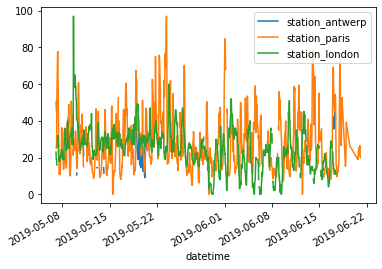

In [29]:
air_quality.plot();

### 對某個 series 畫圖 (該series line plot)

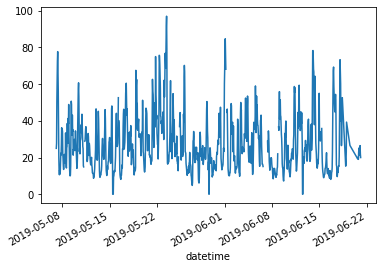

In [31]:
air_quality["station_paris"].plot();

### Scatter plot

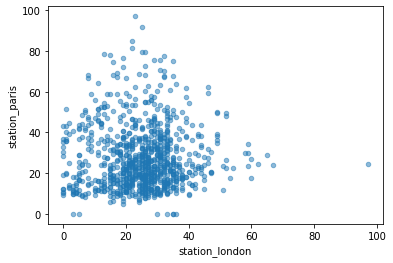

In [32]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5);

### Box plot

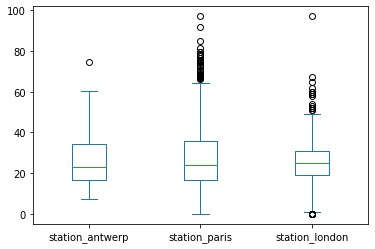

In [35]:
air_quality.plot.box(); # 對每個 column 畫圖

### Area plot

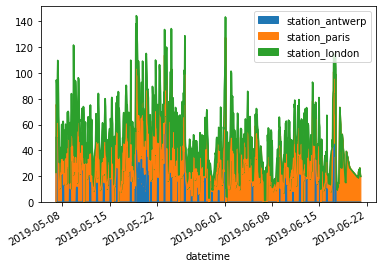

In [37]:
air_quality.plot.area();

### subplot

* 如果我想做成 subplot，可以這樣做：

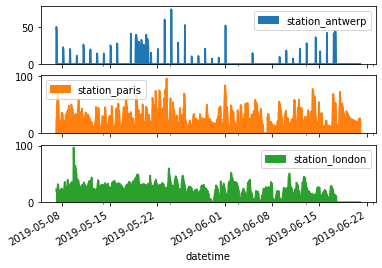

In [40]:
air_quality.plot.area(subplots = True);

### 更多客製化

* 如果要做更多客製化，那就要用 matplotlib 的 oop 的寫法

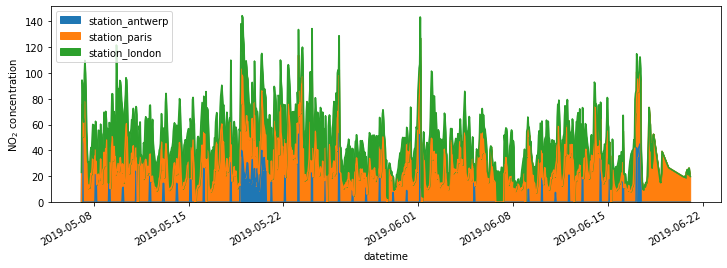

In [45]:
fig, axs = plt.subplots(figsize=(12, 4));
air_quality.plot.area(ax=axs); # 建立連結，pandas畫完的圖，本來就是 matplotlib 物件，現在告訴他我要把這物件更新到外面的 axs
axs.set_ylabel("NO$_2$ concentration");
# fig.savefig("no2_concentrations.png")

### 更多細節

* 更多畫圖的細節，請參考 user guide 的 [chart Visualization](https://pandas.pydata.org/docs/user_guide/visualization.html#)

## 如何新增 column

### 某個 column 乘上一個常數

![](figures/schemas/05_newcolumn_1.svg)

* 如上圖，我想新增 column，我可以這樣做：

In [46]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


### 多個 column 間的運算

![](figures/schemas/05_newcolumn_2.svg)

* 那如果是像上圖，我要用兩個欄位來計算出新欄位，我可以這樣做：

In [47]:
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]
)

air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


### rename

* 要對 column name 做 rename 的話，可以這樣做

In [48]:
air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)

air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


* 我也可以用 function，把 column name 都轉小寫：

In [49]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


## 如何做 summary statistics

### aggregating statistics

![](figures/schemas/06_aggregate.svg)

In [50]:
titanic["Age"].mean()

29.69911764705882

![](figures/schemas/06_reduction.svg)

In [51]:
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [52]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [53]:
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


### by group

![](figures/schemas/06_groupby_select_detail.svg)

In [58]:
(
    titanic
    .groupby("Sex")
    ["Age"]
    .mean()
)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

![](figures/schemas/06_groupby_agg_detail.svg)

In [59]:
titanic.groupby("Sex").mean() # 對所有 numeric column 取 mean

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [60]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

### count number

* 如果我只是想看某個類別變數 (e.g. `Pclass`) 的次數分配，那可以這樣做：

In [61]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* 那其實我也可以這樣做：

In [62]:
titanic.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

* 上面的過程，就如下圖：

![](figures/schemas/06_valuecounts.svg)

## 如何 reshape

### Long to wide (pivot)(R的pivot wider)

* 我們來看一下 long data 的範例 (就是 stack data 啦)

In [73]:
air_quality = pd.read_csv(
    "data/air_quality_long.csv", parse_dates=True
)
air_quality = air_quality[air_quality["parameter"]=="no2"]
air_quality.sort_values(["country","city","date.utc"])

,city,country,date.utc,location,parameter,value,unit
3663,Antwerpen,BE,2019-04-09 01:00:00+00:00,BETR801,no2,22.5,µg/m³
3662,Antwerpen,BE,2019-04-09 02:00:00+00:00,BETR801,no2,53.5,µg/m³
3661,Antwerpen,BE,2019-04-09 03:00:00+00:00,BETR801,no2,54.5,µg/m³
3660,Antwerpen,BE,2019-04-09 04:00:00+00:00,BETR801,no2,34.5,µg/m³
3659,Antwerpen,BE,2019-04-09 05:00:00+00:00,BETR801,no2,46.5,µg/m³
...,...,...,...,...,...,...,...
3668,London,GB,2019-06-17 07:00:00+00:00,London Westminster,no2,13.0,µg/m³
3667,London,GB,2019-06-17 08:00:00+00:00,London Westminster,no2,13.0,µg/m³
3666,London,GB,2019-06-17 09:00:00+00:00,London Westminster,no2,11.0,µg/m³
3665,London,GB,2019-06-17 10:00:00+00:00,London Westminster,no2,11.0,µg/m³


* 從上表可以看到，每一列的 key 是 country + city + date.utc + location，表示該城市在該時間點的該測站，所測到的數值
* 那 location 就是被我堆疊起來的變數，我想把 location 來成 column，我可以這樣做

In [79]:
air_quality_wide = air_quality.pivot(
    index = ["city", "country", "date.utc"],
    columns = "location",
    values = "value"
).reset_index() # 如果不 reset_index 的話， city, country, date.utc 會被放在 index
air_quality_wide

location,city,country,date.utc,BETR801,FR04014,London Westminster
0,Antwerpen,BE,2019-04-09 01:00:00+00:00,22.5,NaN,NaN
1,Antwerpen,BE,2019-04-09 02:00:00+00:00,53.5,NaN,NaN
2,Antwerpen,BE,2019-04-09 03:00:00+00:00,54.5,NaN,NaN
3,Antwerpen,BE,2019-04-09 04:00:00+00:00,34.5,NaN,NaN
4,Antwerpen,BE,2019-04-09 05:00:00+00:00,46.5,NaN,NaN
...,...,...,...,...,...,...
3442,Paris,FR,2019-06-20 20:00:00+00:00,NaN,21.4,NaN
3443,Paris,FR,2019-06-20 21:00:00+00:00,NaN,24.9,NaN
3444,Paris,FR,2019-06-20 22:00:00+00:00,NaN,26.5,NaN
3445,Paris,FR,2019-06-20 23:00:00+00:00,NaN,21.8,NaN


* 看說明文件，可以看到更多例子：

In [77]:
air_quality.pivot?

Signature: air_quality.pivot(index=None, columns=None, values=None) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
index : str or object or a list of str, optional
    Column to use to make new frame's index. If None, uses
    existing index.

    .. versionchanged:: 1.1.0
       Also accept list of index names.

columns : str or object or a list of str
    Column to use to make new frame's columns.

    .. versionchanged:: 1.1.0
       Also accept list of columns names.

values : str, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    

### wide to long (melt)(R的pivot_longer)

* 回顧剛剛的 wide data：

In [80]:
air_quality_wide

location,city,country,date.utc,BETR801,FR04014,London Westminster
0,Antwerpen,BE,2019-04-09 01:00:00+00:00,22.5,NaN,NaN
1,Antwerpen,BE,2019-04-09 02:00:00+00:00,53.5,NaN,NaN
2,Antwerpen,BE,2019-04-09 03:00:00+00:00,54.5,NaN,NaN
3,Antwerpen,BE,2019-04-09 04:00:00+00:00,34.5,NaN,NaN
4,Antwerpen,BE,2019-04-09 05:00:00+00:00,46.5,NaN,NaN
...,...,...,...,...,...,...
3442,Paris,FR,2019-06-20 20:00:00+00:00,NaN,21.4,NaN
3443,Paris,FR,2019-06-20 21:00:00+00:00,NaN,24.9,NaN
3444,Paris,FR,2019-06-20 22:00:00+00:00,NaN,26.5,NaN
3445,Paris,FR,2019-06-20 23:00:00+00:00,NaN,21.8,NaN


* 我現在想倒過來，把 BETR801~London 這幾個 column，折下來，那我可以這樣做：

In [83]:
air_quality_long = air_quality_wide.melt(
    id_vars=["city","country", "date.utc"],
    value_vars=["BETR801", "FR04014", "London Westminster"],
    var_name="location", # 轉成新column後的 column name
    value_name="NO_2", # 轉成新 column 後的 value name
)
air_quality_long

,city,country,date.utc,location,NO_2
0,Antwerpen,BE,2019-04-09 01:00:00+00:00,BETR801,22.5
1,Antwerpen,BE,2019-04-09 02:00:00+00:00,BETR801,53.5
2,Antwerpen,BE,2019-04-09 03:00:00+00:00,BETR801,54.5
3,Antwerpen,BE,2019-04-09 04:00:00+00:00,BETR801,34.5
4,Antwerpen,BE,2019-04-09 05:00:00+00:00,BETR801,46.5
...,...,...,...,...,...
10336,Paris,FR,2019-06-20 20:00:00+00:00,London Westminster,NaN
10337,Paris,FR,2019-06-20 21:00:00+00:00,London Westminster,NaN
10338,Paris,FR,2019-06-20 22:00:00+00:00,London Westminster,NaN
10339,Paris,FR,2019-06-20 23:00:00+00:00,London Westminster,NaN


## 如何 concat (R 的 bind_rows, bind_cols)

### concat (axis = 0) (bind_rows)

In [85]:
df1 = pd.DataFrame({
    "a": [1,2,3],
    "b": [4,5,6]
})
df2 = pd.DataFrame({
    "a": [7,8,9],
    "b": [10,11,12]
})

print(df1)
print(df2)

   a  b
0  1  4
1  2  5
2  3  6
   a   b
0  7  10
1  8  11
2  9  12


In [86]:
pd.concat([df1, df2], axis = 0)

,a,b
0,1,4
1,2,5
2,3,6
0,7,10
1,8,11
2,9,12


## 如何 merge (R 的 join)

In [87]:
df1 = pd.DataFrame({
    "a": ["A", "A", "B"],
    "b": [4,5,6]
})
df2 = pd.DataFrame({
    "a": ["A","B","C"],
    "c": ["AA","BB","CC"]
})

print(df1)
print(df2)

   a  b
0  A  4
1  A  5
2  B  6
   a   c
0  A  AA
1  B  BB
2  C  CC


In [88]:
df1.merge(df2, how = "left", on = "a")

,a,b,c
0,A,4,AA
1,A,5,AA
2,B,6,BB


* 如果要merge的名稱不同，例如這樣

In [89]:
df1 = pd.DataFrame({
    "a1": ["A", "A", "B"],
    "b": [4,5,6]
})
df2 = pd.DataFrame({
    "a2": ["A","B","C"],
    "c": ["AA","BB","CC"]
})

print(df1)
print(df2)

  a1  b
0  A  4
1  A  5
2  B  6
  a2   c
0  A  AA
1  B  BB
2  C  CC


In [90]:
df1.merge(df2, how = "left", left_on = "a1", right_on = "a2")

,a1,b,a2,c
0,A,4,A,AA
1,A,5,A,AA
2,B,6,B,BB


## 如何處理 time-series data

In [91]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


* 我們首先看一下這筆資料，他的 `datetime` 欄位，是哪種 type:

In [93]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   datetime   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


* 可以發現， datetime 是 "object"，就是文字/類別的意思，所以我先把他轉為 datetime 格式

In [94]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

* 可以看到，現在 dtype 是 datetime64 了
* 那為啥轉格式重要？因為有很多好用的 method 可以用

### 最大最小值

* 就很直觀的，想看時間資料的最大值和最小值：

In [95]:
print(air_quality["datetime"].min())
print(air_quality["datetime"].max())

2019-05-07 01:00:00+00:00
2019-06-21 00:00:00+00:00


* 可以看到，時間最早是 5/7，最晚是 6/21. 
* 那我還可以看一下時間距離多久？

In [96]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

### 從時間資料中，擷取 年/月/日/星期幾...

* 要擷取的這些資訊，都是 datetime 這個 series 的 attribute，我們可以這樣取

In [154]:
print("datetime: ", air_quality["datetime"][0])
print("date: ", air_quality["datetime"].dt.date[0])
print("year: ", air_quality["datetime"].dt.year[0])
print("month: ", air_quality["datetime"].dt.month[0])
print("day: ", air_quality["datetime"].dt.day[0])
print("hour: ", air_quality["datetime"].dt.hour[0])
print("minute: ", air_quality["datetime"].dt.minute[0])
print("second: ", air_quality["datetime"].dt.second[0])
print("weekday: ", air_quality["datetime"].dt.weekday[0])

datetime:  2019-06-21 00:00:00+00:00
date:  2019-06-21
year:  2019
month:  6
day:  21
hour:  0
minute:  0
second:  0
weekday:  4


* 可以看到，我取出 series 後，我還得用 `dt` 這個 accesor，他才知道我要調用 datetime 的 method，然後後面就直接用 date/year/month...等 attribute

* 來練習一下吧，我如果想新增一個欄位，是只取出月份，那我可以這樣做：

In [101]:
air_quality["month"] = air_quality["datetime"].dt.month # .dt 是調用datetime的 method/attribute，month看起來是attribute
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


* 如果想取出星期幾(weekday)，我可以這樣做：

In [102]:
air_quality["weekday"] = air_quality["datetime"].dt.weekday # .dt 是調用datetime的 method/attribute，month看起來是attribute
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,3


* 我如果想看每個location，每個weekday，平均的 NO2 濃度，我就可以這樣做：

In [103]:
air_quality.groupby(["location", "weekday"])["value"].mean()

location            weekday
BETR801             0          27.875000
                    1          22.214286
                    2          21.125000
                    3          27.500000
                    4          28.400000
                    5          33.500000
                    6          21.896552
FR04014             0          24.856250
                    1          30.999359
                    2          29.165753
                    3          28.600690
                    4          31.617986
                    5          25.266154
                    6          23.274306
London Westminster  0          23.969697
                    1          24.885714
                    2          23.460432
                    3          24.780142
                    4          26.446809
                    5          24.977612
                    6          24.859155
Name: value, dtype: float64

* 我想畫每個小時的平均 NO2 濃度

<AxesSubplot:xlabel='hour'>

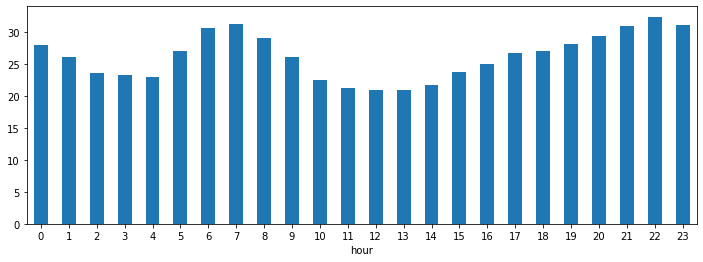

In [118]:
fig, axs = plt.subplots(figsize=(12, 4))

(
    air_quality
        .assign(hour = lambda df: df.datetime.dt.hour)
        .groupby("hour")["value"]
        .mean()
        .plot(kind='bar', rot=0, ax=axs)
)

### slicing datetime

* 我們這邊先把資料做成 wide 的形式：

In [131]:
no_2 = air_quality.pivot(
    index = "datetime",
    columns = "location",
    values = "value"
).reset_index()
no_2.head()

location,datetime,BETR801,FR04014,London Westminster
0,2019-05-07 01:00:00+00:00,50.5,25.0,23.0
1,2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2,2019-05-07 03:00:00+00:00,NaN,50.4,19.0
3,2019-05-07 04:00:00+00:00,NaN,61.9,16.0
4,2019-05-07 05:00:00+00:00,NaN,72.4,NaN


* 可以看到，現在有三條時間序列
* 我如果想取出 "2019-05-20" ~ "2019-05-21" 的資料，我可以這樣做：

In [137]:
no_2[(no_2.datetime >= "2019-05-20") & (no_2.datetime <= "2019-05-21")].head()

location,datetime,BETR801,FR04014,London Westminster
311,2019-05-20 00:00:00+00:00,26.0,16.4,28.0
312,2019-05-20 01:00:00+00:00,17.0,12.8,28.0
313,2019-05-20 02:00:00+00:00,10.5,12.1,32.0
314,2019-05-20 03:00:00+00:00,9.0,12.6,32.0
315,2019-05-20 04:00:00+00:00,14.0,14.9,26.0


* 但我還有另外一招，我可以把 datetime 挪去 index，然後直接篩選：

In [136]:
no_2_with_datetime_index = no_2.set_index("datetime")
no_2_with_datetime_index["2019-05-20":"2019-05-21"].head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-20 00:00:00+00:00,26.0,16.4,28.0
2019-05-20 01:00:00+00:00,17.0,12.8,28.0
2019-05-20 02:00:00+00:00,10.5,12.1,32.0
2019-05-20 03:00:00+00:00,9.0,12.6,32.0
2019-05-20 04:00:00+00:00,14.0,14.9,26.0


* 帥吧！接下來，我就可以畫出這三條時間序列：

<AxesSubplot:xlabel='datetime'>

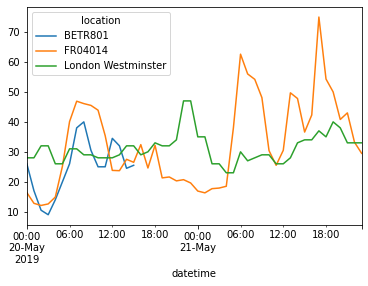

In [138]:
no_2_with_datetime_index["2019-05-20":"2019-05-21"].plot()

### Resample 成不同的 frequency

* 其實 resample 的語法，就是 groupby 再 aggregate 的 shortcut. 
* 舉個例子就懂了。
* 我如果想看每天各個location的平均NO2的值 (所以把 ymd_hms 的 frequency 改成 ymd 而已)，那我得這樣做：

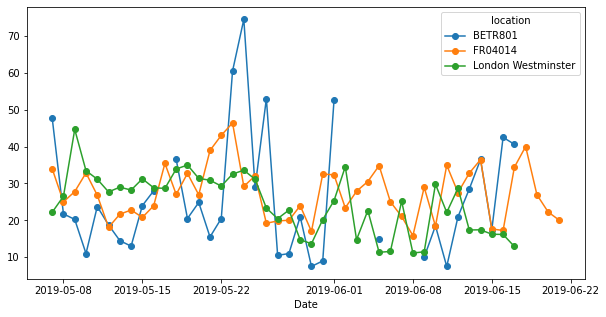

In [151]:
(
    no_2
        .assign(Date = lambda df: df.datetime.dt.date)
        .groupby("Date")
        .mean()
        .plot(style="-o", figsize=(10, 5))
);

* 那我現在可以用這個 resample 的語法，很快做到這件事

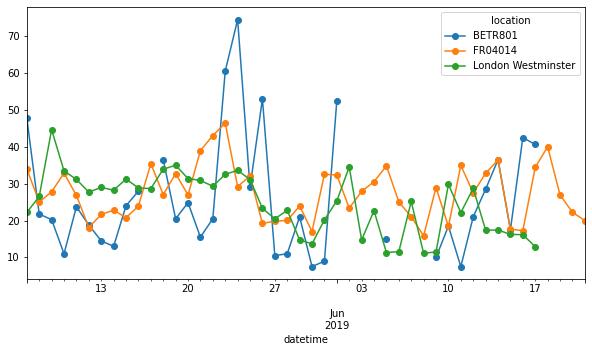

In [149]:
(
    no_2
        .set_index("datetime")
        .resample("D")
        .mean()
        .plot(style="-o", figsize=(10, 5))
);

## 如何 manipulate textual data

* 這一節要用的 data 是 Titanic

In [152]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 把某個欄位全轉小寫

* 很快就可以聯想到 `str.lower()` 這個 method，所以作法就是：

In [153]:
titanic["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

### 把某個欄位依照pattern切開

* 舉例來說，`Name` 這個欄位，就用 `,` 來分隔出 first name 和 last name. 
* 所以，我想把它切開來後，分別叫他 first name 和 last name

In [156]:
titanic["split_res"] = titanic["Name"].str.split(",")
titanic[["Name", "split_res"]]

,Name,split_res
0,"Braund, Mr. Owen Harris","[Braund, Mr. Owen Harris]"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","[Cumings, Mrs. John Bradley (Florence Briggs ..."
2,"Heikkinen, Miss. Laina","[Heikkinen, Miss. Laina]"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","[Futrelle, Mrs. Jacques Heath (Lily May Peel)]"
4,"Allen, Mr. William Henry","[Allen, Mr. William Henry]"
...,...,...
886,"Montvila, Rev. Juozas","[Montvila, Rev. Juozas]"
887,"Graham, Miss. Margaret Edith","[Graham, Miss. Margaret Edith]"
888,"Johnston, Miss. Catherine Helen ""Carrie""","[Johnston, Miss. Catherine Helen ""Carrie""]"
889,"Behr, Mr. Karl Howell","[Behr, Mr. Karl Howell]"


* 那如果要再分成 first_name 和 last_name，就得這樣：

In [159]:
titanic["first_name"] = titanic["split_res"].str.get(0) # 取第0個element
titanic["last_name"] = titanic["split_res"].str.get(1) # 取第0個element
titanic[["Name", "split_res", "first_name", "last_name"]]

,Name,split_res,first_name,last_name
0,"Braund, Mr. Owen Harris","[Braund, Mr. Owen Harris]",Braund,Mr. Owen Harris
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","[Cumings, Mrs. John Bradley (Florence Briggs ...",Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,"Heikkinen, Miss. Laina","[Heikkinen, Miss. Laina]",Heikkinen,Miss. Laina
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,"Allen, Mr. William Henry","[Allen, Mr. William Henry]",Allen,Mr. William Henry
...,...,...,...,...
886,"Montvila, Rev. Juozas","[Montvila, Rev. Juozas]",Montvila,Rev. Juozas
887,"Graham, Miss. Margaret Edith","[Graham, Miss. Margaret Edith]",Graham,Miss. Margaret Edith
888,"Johnston, Miss. Catherine Helen ""Carrie""","[Johnston, Miss. Catherine Helen ""Carrie""]",Johnston,"Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell","[Behr, Mr. Karl Howell]",Behr,Mr. Karl Howell


### 是否包含某字串

* 如果我想找找看，名字裡面，有出現 `Countess` 的人，那我可以這樣做：

In [160]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split_res,first_name,last_name,中文可以嗎
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,"[Rothes, the Countess. of (Lucy Noel Martha D...",Rothes,the Countess. of (Lucy Noel Martha Dyer-Edwards),Rothes


### 字串長度

* 我可以這樣，來造出字長：

In [161]:
titanic["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

* 所以，我如果想找出名字最長的人，我可以這樣做：

In [171]:
(
    titanic
        .assign(name_length = lambda df: df.Name.str.len())
        .sort_values("name_length", ascending=False)
        [["Name", "name_length"]]
        .head(3) # 前三名
)

,Name,name_length
307,"Penasco y Castellana, Mrs. Victor de Satode (M...",82
427,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",67
556,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",65


### 字串取代

* 我如果想把 `Sex` 這個欄位的 "female"，取代為 "F"，我可以這樣做:

In [172]:
titanic["Sex"].str.replace("female", "F")

0      male
1         F
2         F
3         F
4      male
       ... 
886    male
887       F
888       F
889    male
890    male
Name: Sex, Length: 891, dtype: object

* 所以，我如果想把 `Sex` 這個欄位的 "female" 改成 "F", "male" 改成 "M"，那我可以這樣做：

In [173]:
titanic["Sex_short1"] = titanic["Sex"].str.replace("female", "F")
titanic["Sex_short1"] = titanic["Sex_short1"].str.replace("male", "M")
titanic[["Sex", "Sex_short1"]].head()

,Sex,Sex_short1
0,male,M
1,female,F
2,female,F
3,female,F
4,male,M


* 事實上，如果你是要做這種取代的話，更好的做法是這樣：

In [175]:
titanic["Sex_short2"] = titanic["Sex"].replace({"male": "M", "female": "F"})
titanic[["Sex","Sex_short1","Sex_short2"]].head()

,Sex,Sex_short1,Sex_short2
0,male,M,M
1,female,F,F
2,female,F,F
3,female,F,F
4,male,M,M
